In [1]:
import os

import pandas as pd
import numpy as np
import pylab as plt
plt.matplotlib.style.use('fivethirtyeight')
%matplotlib inline

<br>
## I/O and Format Conversions

In [9]:
url = (
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/data/tips.csv'
)
df = pd.read_csv(url)

In [10]:
fn = 'tips.jsoin'
df.to_json(fn)

with open(fn) as f:
    print(f.read()[:500] + '...')

{"total_bill":{"0":16.99,"1":10.34,"2":21.01,"3":23.68,"4":24.59,"5":25.29,"6":8.77,"7":26.88,"8":15.04,"9":14.78,"10":10.27,"11":35.26,"12":15.42,"13":18.43,"14":14.83,"15":21.58,"16":10.33,"17":16.29,"18":16.97,"19":20.65,"20":17.92,"21":20.29,"22":15.77,"23":39.42,"24":19.82,"25":17.81,"26":13.37,"27":12.69,"28":21.7,"29":19.65,"30":9.55,"31":18.35,"32":15.06,"33":20.69,"34":17.78,"35":24.06,"36":16.31,"37":16.93,"38":18.69,"39":31.27,"40":16.04,"41":17.46,"42":13.94,"43":9.68,"44":30.4,"45":...


In [12]:
if os.path.isfile(fn):
    os.remove(fn)

<br>
## Descriptive Info

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [15]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
df.describe(include=['object'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


<br>
## Mutability

In [17]:
df['tip_percent'] = df['tip'] / df['total_bill']
df['totally_dumb_column'] = np.random.random(df.shape[0])

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent,totally_dumb_column
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0.465515
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,0.743808
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,0.847701
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,0.354460
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0.776685


In [19]:
del df['totally_dumb_column']

In [20]:
list(df.columns)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_percent']

<br>
## Filtering

In [21]:
mask = (df['sex'] == 'Male') & (df['total_bill'] > 10.00)
df[mask].head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780


In [22]:
df[mask].describe()

,total_bill,tip,size,tip_percent
count,146.000000,146.000000,146.000000,146.000000
mean,21.657123,3.175205,2.684932,0.151715
std,8.940516,1.482820,0.966711,0.046967
min,10.070000,1.000000,2.000000,0.035638
25%,15.435000,2.000000,2.000000,0.119297
50%,19.465000,3.000000,2.000000,0.149856
75%,25.492500,3.880000,3.000000,0.184942
max,50.810000,10.000000,6.000000,0.291990


<br>
## Flexible Accessing

------

**[ ]** the get item access is intentially flexible for a variety of access methods

------

**iloc** is for accessing **by integer** & integers are **exclusive** of the end value

**loc** is for accessing **by label** & labels are **inclusive** of the end value

------
**ix** is for accessing **by integer and label**

integers are **exclusive** of the end value

labels are **inclusive** of the end value

In [23]:
df['tip'].head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [24]:
df['tip'][:3]

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

In [25]:
df['tip'][df['tip_percent'] < 0.06]

0      1.01
57     1.50
102    2.50
237    1.17
Name: tip, dtype: float64

In [26]:
df[:2]

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542


In [27]:
df.iloc[:3, :4]

,total_bill,tip,sex,smoker
0,16.99,1.01,Female,No
1,10.34,1.66,Male,No
2,21.01,3.50,Male,No


In [28]:
df.loc[:, 'tip': 'smoker'].head(3)

,tip,sex,smoker
0,1.01,Female,No
1,1.66,Male,No
2,3.50,Male,No


<br>
## Handling Missing Values

In [30]:
df.ix[df['size'] == 2, 'size'] = None

In [31]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,NaN,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587


In [32]:
df.fillna(-99).head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,-99.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587


In [33]:
df.dropna().head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808


In [34]:
df.fillna(2, inplace=True)

In [35]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587


<br>
## Statistics and Math 

In [36]:
df.min()

total_bill          3.07
tip                    1
sex               Female
smoker                No
day                  Fri
time              Dinner
size                   1
tip_percent    0.0356381
dtype: object

In [37]:
df.max()

total_bill        50.81
tip                  10
sex                Male
smoker              Yes
day                Thur
time              Lunch
size                  6
tip_percent    0.710345
dtype: object

In [38]:
df.mean()

total_bill     19.785943
tip             2.998279
size            2.569672
tip_percent     0.160803
dtype: float64

In [39]:
df.std()

total_bill     8.902412
tip            1.383638
size           0.951100
tip_percent    0.061072
dtype: float64

In [40]:
df.quantile(0.3)

total_bill     14.249000
tip             2.000000
size            2.000000
tip_percent     0.137238
dtype: float64

In [41]:
df.cov()

,total_bill,tip,size,tip_percent
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_percent,-0.184107,0.028931,-0.008298,0.003730


In [42]:
df.corr()

,total_bill,tip,size,tip_percent
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_percent,-0.338624,0.342370,-0.142860,1.000000


<br>
## Groupby Aggregation

In [43]:
gb = df.groupby('sex')
gb['tip_percent'].mean()

sex
Female    0.166491
Male      0.157651
Name: tip_percent, dtype: float64

In [44]:
gb = df.groupby(('sex', 'day'))
gb.mean()

total_bill       tip      size  tip_percent
sex    day                                              
Female Fri    14.145556  2.781111  2.111111     0.199388
       Sat    19.680357  2.801786  2.250000     0.156470
       Sun    19.872222  3.367222  2.944444     0.181569
       Thur   16.715312  2.575625  2.468750     0.157525
Male   Fri    19.857000  2.693000  2.100000     0.143385
       Sat    20.802542  3.083898  2.644068     0.151577
       Sun    21.887241  3.220345  2.810345     0.162344
       Thur   18.714667  2.980333  2.433333     0.165276

<br>
## Data Alignment

In [45]:
mean_by_day = df.groupby('day').mean()
mean_by_day.head(3)

,total_bill,tip,size,tip_percent
day,,,,
Fri,17.151579,2.734737,2.105263,0.169913
Sat,20.441379,2.993103,2.517241,0.153152
Sun,21.410000,3.255132,2.842105,0.166897


In [48]:
index = [
    'Mon', 'Tue', 'Wed', 
    'Thur', 'Fri', 'Sat', 'Sun'
]
data = {
    'takehome_percent': np.random.random(len(index)),
}

df_percent_takehome = pd.DataFrame(data, index=index)
df_percent_takehome

,takehome_percent
Mon,0.169295
Tue,0.675815
Wed,0.457629
Thur,0.482166
Fri,0.483651
Sat,0.912389
Sun,0.741331


In [47]:
df_percent_takehome.join(mean_by_day)

,takehome_percent,total_bill,tip,size,tip_percent
Mon,0.284653,NaN,NaN,NaN,NaN
Tue,0.232131,NaN,NaN,NaN,NaN
Wed,0.998957,NaN,NaN,NaN,NaN
Thur,0.256711,17.682742,2.771452,2.451613,0.161276
Fri,0.659085,17.151579,2.734737,2.105263,0.169913
Sat,0.365878,20.441379,2.993103,2.517241,0.153152
Sun,0.909365,21.410000,3.255132,2.842105,0.166897


<br>
## Data Visualization

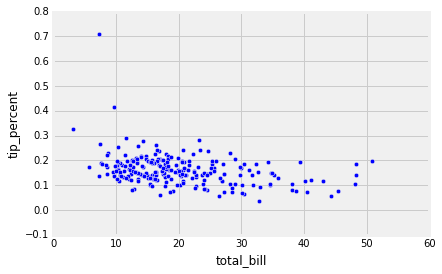

In [49]:
ax = df.plot.scatter('total_bill', 'tip_percent')

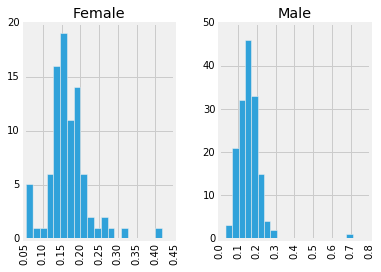

In [50]:
ax = df.hist('tip_percent', bins=20, by='sex')

For more check out http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html